In [1]:
import matplotlib.pyplot as plt
plt.rcParams['text.usetex']=True
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
import numpy as np
import math
import pandas
import itertools

In [3]:
data=np.array([[-1, -1 ,1, -1, 1, -1, -1, 1],[-1 ,-1, -1, -1, -1, 1, -1, -1],[-1, 1, 1, -1, -1, 1, -1, 1]])
data

array([[-1, -1,  1, -1,  1, -1, -1,  1],
       [-1, -1, -1, -1, -1,  1, -1, -1],
       [-1,  1,  1, -1, -1,  1, -1,  1]])

In [4]:
def hebbiantraining(data):   #function that trains an hopfield network given a data matrix
    N=len(data[0])
    P=len(data[:,0])
    W=np.zeros((N,N))
    for k in range(P):
        for i in range(N):
            for j in range(N):
                W[i,j]+=data[k,i]*data[k,j]
    return W/N
W=hebbiantraining(data)
print(W)

[[ 0.375  0.125 -0.125  0.375  0.125 -0.125  0.375 -0.125]
 [ 0.125  0.375  0.125  0.125 -0.125  0.125  0.125  0.125]
 [-0.125  0.125  0.375 -0.125  0.125 -0.125 -0.125  0.375]
 [ 0.375  0.125 -0.125  0.375  0.125 -0.125  0.375 -0.125]
 [ 0.125 -0.125  0.125  0.125  0.375 -0.375  0.125  0.125]
 [-0.125  0.125 -0.125 -0.125 -0.375  0.375 -0.125 -0.125]
 [ 0.375  0.125 -0.125  0.375  0.125 -0.125  0.375 -0.125]
 [-0.125  0.125  0.375 -0.125  0.125 -0.125 -0.125  0.375]]


In [5]:
def recall (x,W):        # function that recalls a pattern given a new vector
    yold=np.random.rand(x.size)
    ynew=x
    count=0
    while(not np.array_equal(ynew,yold) or count <1000):  #iterazione fino a convergenza o fino a 1000 se non dovesse convergere
        yold=ynew
        ynew=np.sign(W @ yold.T)
        count+=1
       

    return ynew

print(recall(data[0],W))
print(recall(data[1],W))
print(recall(data[2],W))


[-1. -1.  1. -1.  1. -1. -1.  1.]
[-1. -1. -1. -1. -1.  1. -1. -1.]
[-1.  1.  1. -1. -1.  1. -1.  1.]


In [6]:
# Task 1
datadist=np.array([[ 1 ,-1, 1, -1, 1, -1, -1, 1],[ 1, 1, -1, -1, -1, 1, -1, -1],[ 1, 1, 1, -1, 1, 1, -1, 1]])
print(datadist)
print(recall(datadist[0],W))
print(recall(datadist[1],W))
print(recall(datadist[2],W))
print(data)

[[ 1 -1  1 -1  1 -1 -1  1]
 [ 1  1 -1 -1 -1  1 -1 -1]
 [ 1  1  1 -1  1  1 -1  1]]
[-1. -1.  1. -1.  1. -1. -1.  1.]
[-1. -1. -1. -1. -1.  1. -1. -1.]
[-1.  1.  1. -1. -1.  1. -1.  1.]
[[-1 -1  1 -1  1 -1 -1  1]
 [-1 -1 -1 -1 -1  1 -1 -1]
 [-1  1  1 -1 -1  1 -1  1]]


In [7]:
combinazioni=list(itertools.product([-1,1],repeat=8))  #tutte le possibili combinazioni di -1 e 1
attractors=[]
for x in combinazioni:
    x=np.array(x)
    if np.array_equal(recall(x,W),x):     # x è un attrattore se è un punto fisso della funzione recall
        attractors.append(x)
attractors=np.array(attractors)
print(attractors)      # 10 attrattori

[[-1 -1 -1 -1 -1  1 -1 -1]
 [-1 -1 -1 -1  1 -1 -1 -1]
 [-1 -1  1 -1 -1  1 -1  1]
 [-1 -1  1 -1  1 -1 -1  1]
 [-1  1  1 -1 -1  1 -1  1]
 [ 1 -1 -1  1  1 -1  1 -1]
 [ 1  1 -1  1 -1  1  1 -1]
 [ 1  1 -1  1  1 -1  1 -1]
 [ 1  1  1  1 -1  1  1  1]
 [ 1  1  1  1  1 -1  1  1]]


In [8]:
x2dist=np.array([1,1,1,1,1,1,-1,-1])# i primi 5 numeri sono sbagliati
print(recall(x2dist,W))   #finisce in un altro attrattore, diverso da quelli usati in training

[ 1.  1. -1.  1.  1. -1.  1. -1.]


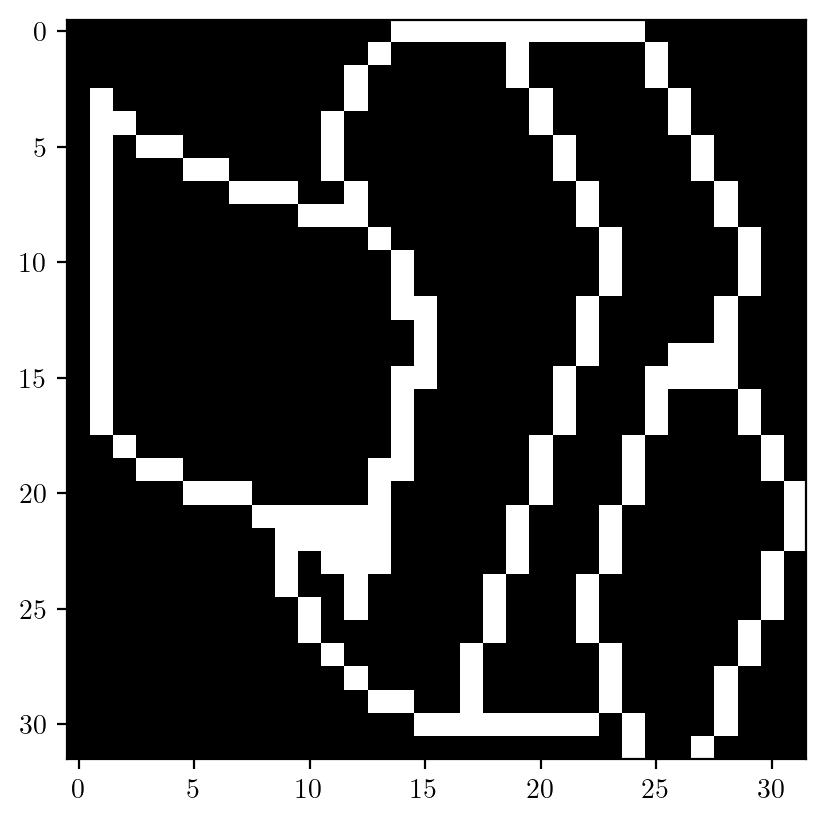

In [42]:
#Task 2
p=np.loadtxt('pict.dat', delimiter=',')
p=p.reshape(11,1024)
p1=p[0]
p2=p[1]
p3=p[2]
p4=p[3]
p5=p[4]
p6=p[5]
p7=p[6]
p8=p[7]
p9=p[8]
p10=p[9]
p11=p[10]
def showpicture(p):
    p_image=p.reshape(32,32)
    plt.imshow(p_image,cmap='gray',vmin=-1,vmax=1)
    plt.show()
showpicture(p1)

In [47]:
training_data=np.array([p1,p2,p3])
W= hebbiantraining(training_data)


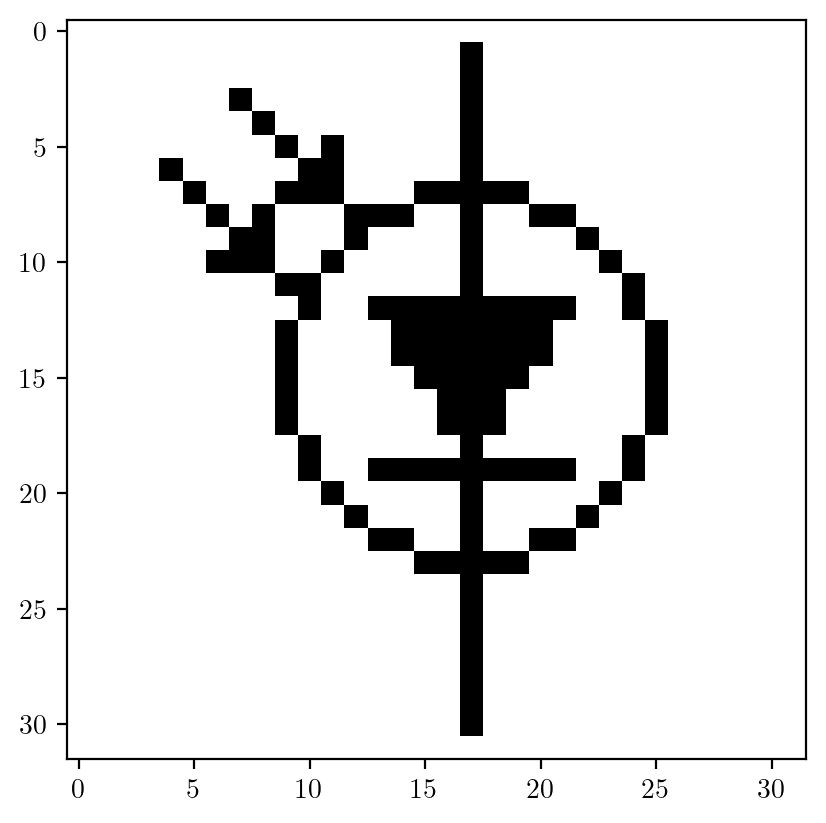

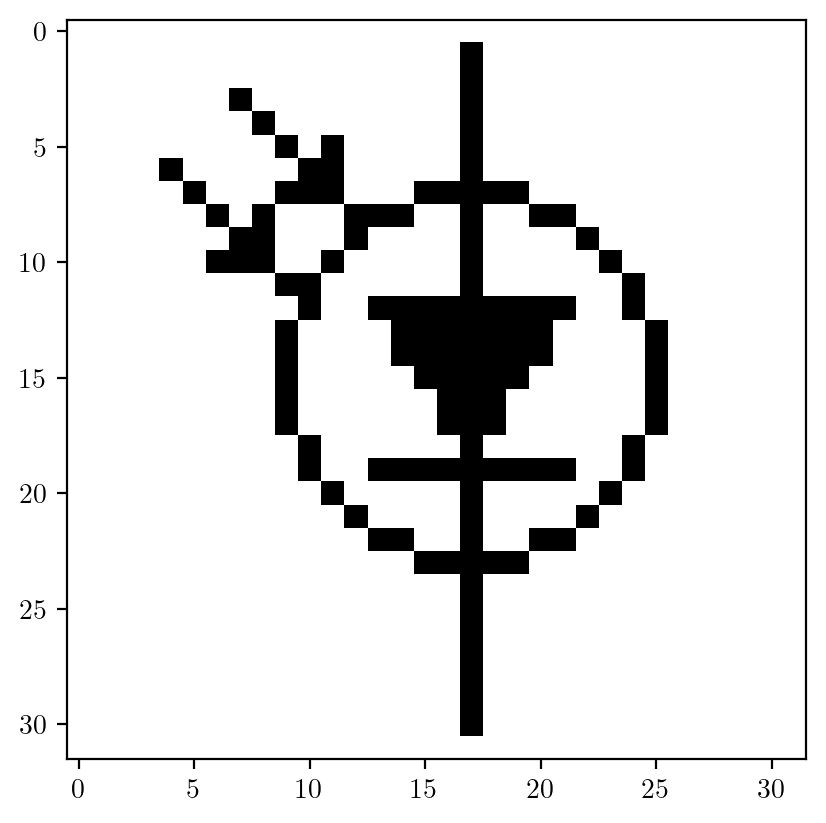

In [52]:
showpicture(p3)
showpicture(recall(p3,W))